___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('case3data.csv')

In [4]:
df.head()

studentID      grade  year  dropped    zip         ethnicity sex   gpa  \
0      12006  12thGrade  2012        0  15232  African American   F  1.89   
1      12008  12thGrade  2012        0  15206  African American   M  2.21   
2      12009  12thGrade  2012        0  15206  African American   M  2.72   
3      12010  12thGrade  2012        1  15206             White   M  1.67   
4      12014  12thGrade  2012        0  15201  African American   M  2.00   

  subsidizedLunches  employmentHours  hrsWifiPerWeek  sanctions  \
0              None                0               4  detention   
1            Partly                0              10    nothing   
2              None                0               8    nothing   
3              None                0               4    nothing   
4             Fully                0               8    nothing   

   librarySwipesPerWeek  apClasses  athleticSeasons  
0                     1          1                0  
1                     3          0                0  
2                     6          0                0  
3                     6          2                0  
4                     5          0                0

In [5]:
df.columns

Index(['studentID', 'grade', 'year', 'dropped', 'zip', 'ethnicity', 'sex',
       'gpa', 'subsidizedLunches', 'employmentHours', 'hrsWifiPerWeek',
       'sanctions', 'librarySwipesPerWeek', 'apClasses', 'athleticSeasons'],
      dtype='object')

## EDA

We'll just check out a simple pairplot for this small dataset.

C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\caiyi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


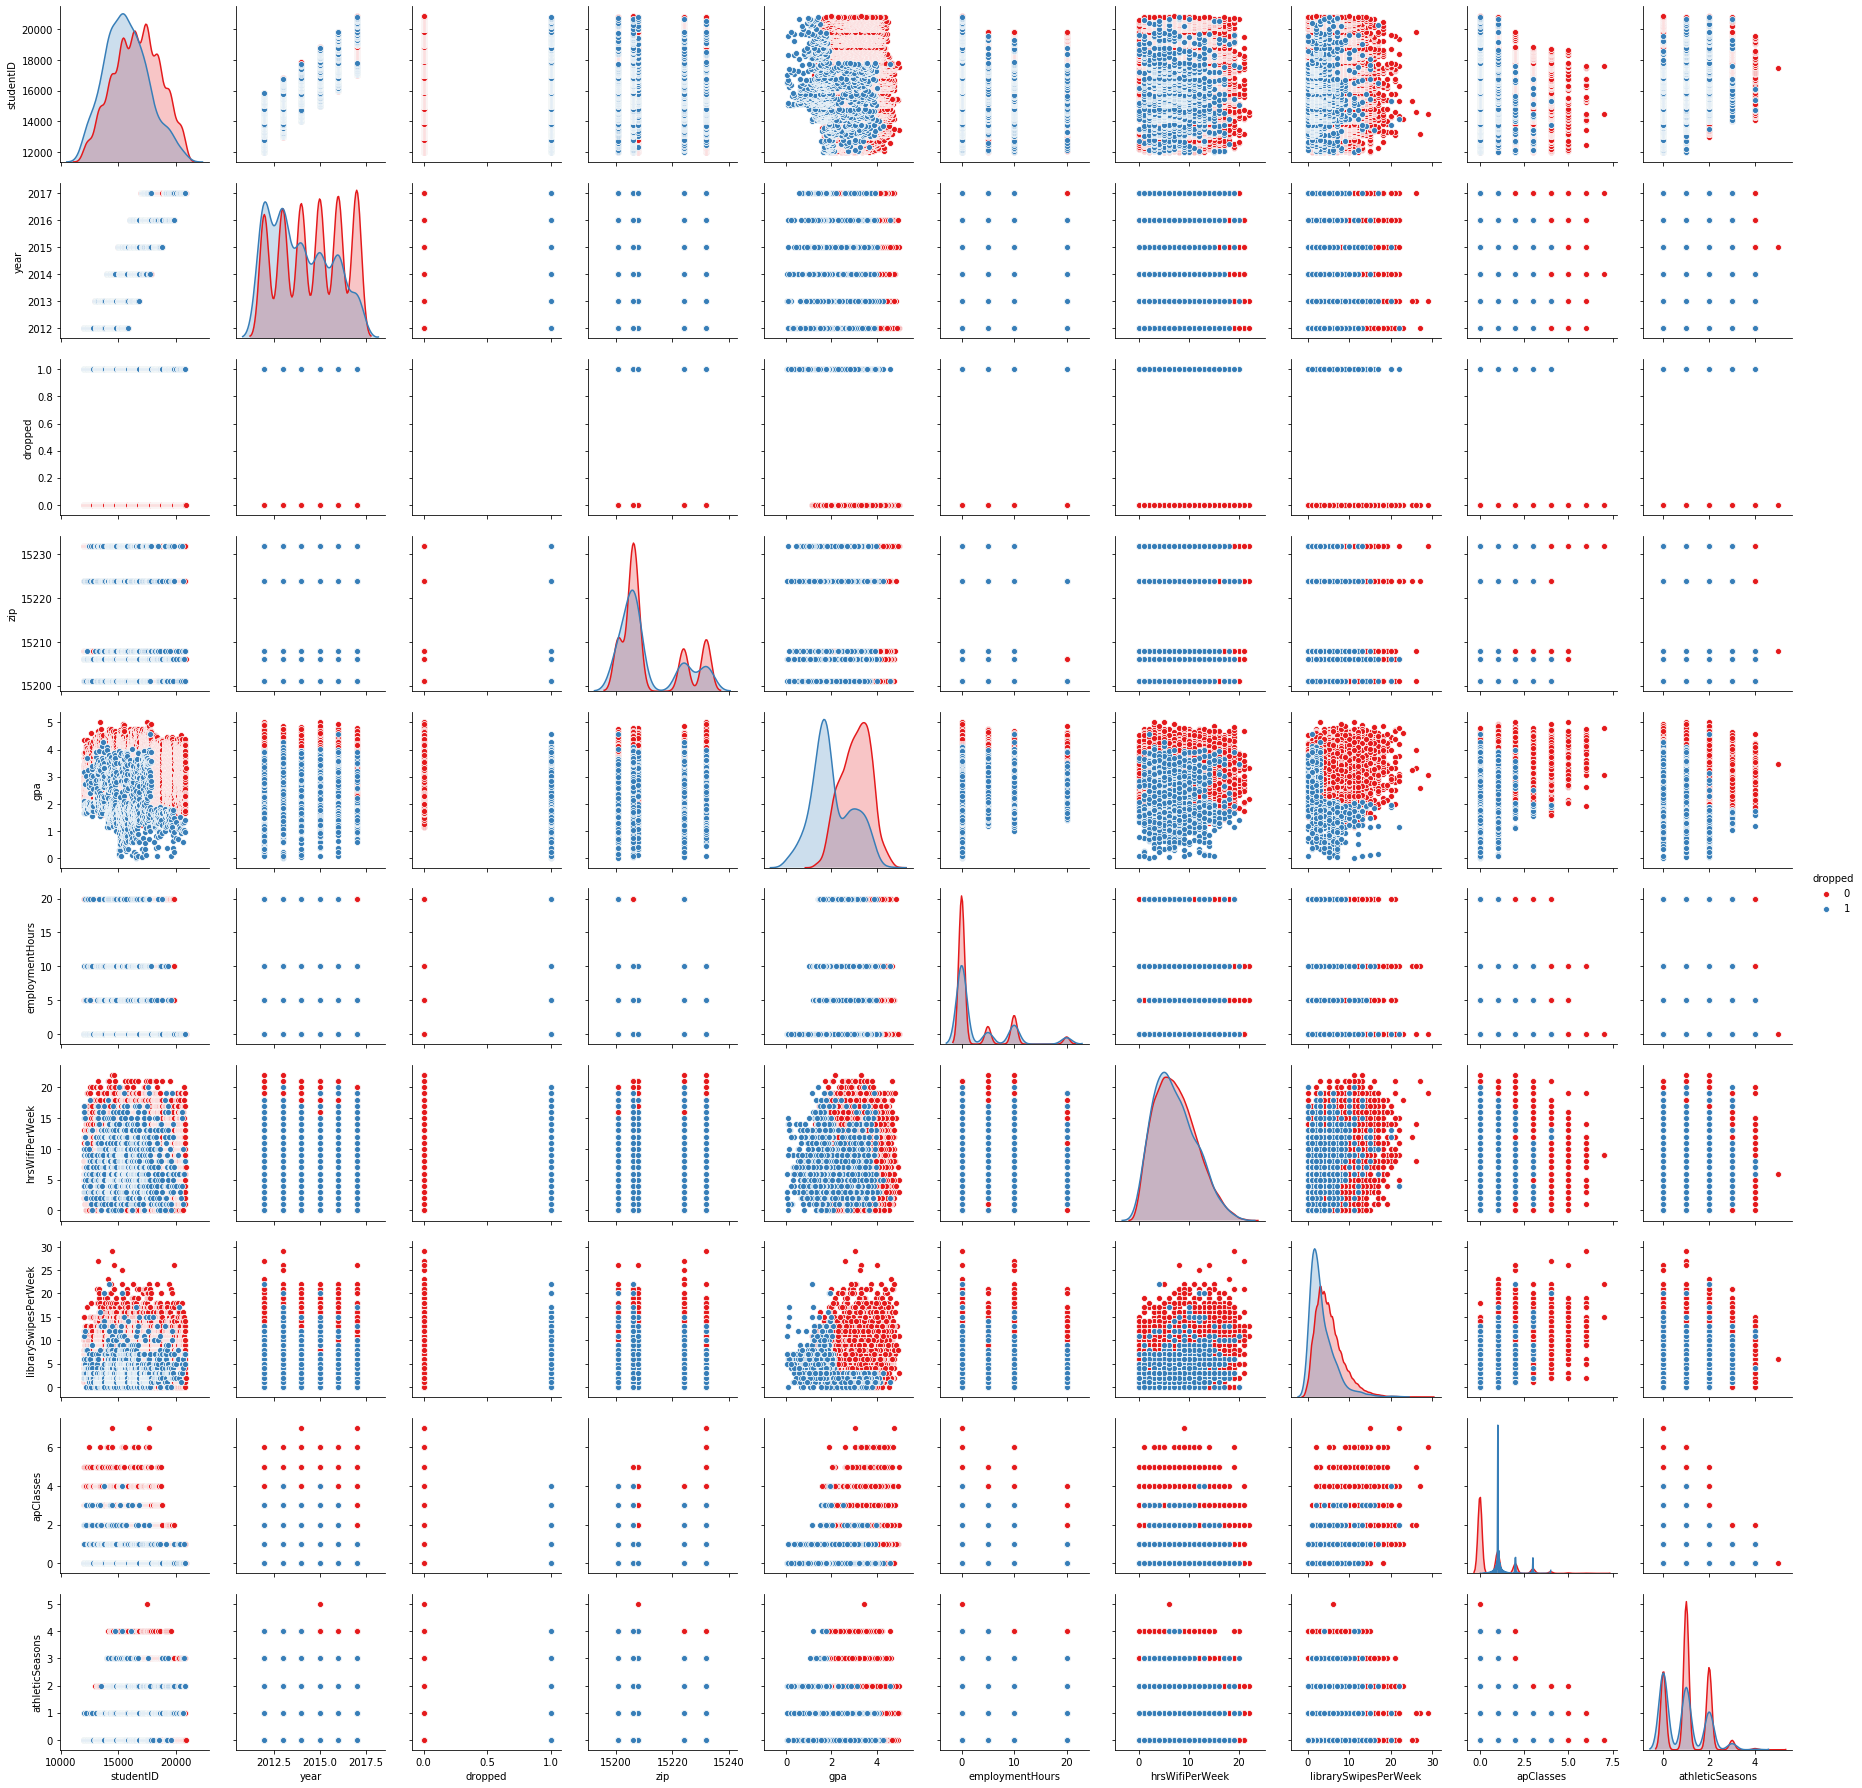

In [6]:
sns.pairplot(df,hue='dropped',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.columns

Index(['studentID', 'grade', 'year', 'dropped', 'zip', 'ethnicity', 'sex',
       'gpa', 'subsidizedLunches', 'employmentHours', 'hrsWifiPerWeek',
       'sanctions', 'librarySwipesPerWeek', 'apClasses', 'athleticSeasons'],
      dtype='object')

In [28]:
df['sanctions'].unique()

array(['detention', 'nothing', 'suspended'], dtype=object)

In [29]:
def label_fix4(label):
    if label=='detention':
        return 1
    elif label=='nothing':
        return 2
    else: 
        return 3
df['sanctions'] = df['sanctions'].apply(label_fix4)

In [26]:
def label_fix3(label):
    if label=='None':
        return 0
    elif label=='Partly':
        return 1
    else: 
        return 2
df['subsidizedLunches'] = df['subsidizedLunches'].apply(label_fix3)

In [18]:
def label_fix(label):
    if label=='12thGrade':
        return 12
    elif label=='11thGrade':
        return 11
    elif label=='10thGrade':
        return 10
    else: 
        return 9
df['grade'] = df['grade'].apply(label_fix)

In [21]:
def label_fix1(label):
    if label=='African American':
        return 1
    elif label=='White':
        return 2
    elif label=='Asian':
        return 3
    elif label=='Hispanic':
        return 4    
    else: 
        return 5
df['ethnicity'] = df['ethnicity'].apply(label_fix1)


In [30]:
def label_fix2(label):
    if label=='F':
        return 1    
    else: 
        return 2
df['sex'] = df['sex'].apply(label_fix2)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17885 entries, 0 to 17884
Data columns (total 15 columns):
studentID               17885 non-null int64
grade                   17885 non-null int64
year                    17885 non-null int64
dropped                 17885 non-null int64
zip                     17885 non-null int64
ethnicity               17885 non-null int64
sex                     17885 non-null int64
gpa                     17885 non-null float64
subsidizedLunches       17885 non-null int64
employmentHours         17885 non-null int64
hrsWifiPerWeek          17885 non-null int64
sanctions               17885 non-null int64
librarySwipesPerWeek    17885 non-null int64
apClasses               17885 non-null int64
athleticSeasons         17885 non-null int64
dtypes: float64(1), int64(14)
memory usage: 2.0 MB


In [52]:
df.to_csv('Numeric_case3data')

In [32]:
X = df.drop(['dropped','studentID'],axis=1)
y = df['dropped']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [37]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5054
           1       0.62      0.60      0.61       312

    accuracy                           0.96      5366
   macro avg       0.80      0.79      0.79      5366
weighted avg       0.95      0.96      0.95      5366



In [40]:
print(confusion_matrix(y_test,predictions))

[[4939  115]
 [ 126  186]]


In [41]:
conda install -c https://conda.binstar.org/sstromberg pydot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [44]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[2:])
features

['year',
 'dropped',
 'zip',
 'ethnicity',
 'sex',
 'gpa',
 'subsidizedLunches',
 'employmentHours',
 'hrsWifiPerWeek',
 'sanctions',
 'librarySwipesPerWeek',
 'apClasses',
 'athleticSeasons']

In [50]:
plt.figure(figsize=(12,6))
sns.set_style('white')

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

<Figure size 864x432 with 0 Axes>

## Random Forests

Now let's compare the decision tree model to a random forest.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rfc_pred = rfc.predict(X_test)

In [48]:
print(confusion_matrix(y_test,rfc_pred))

[[5011   43]
 [ 150  162]]


In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5054
           1       0.79      0.52      0.63       312

    accuracy                           0.96      5366
   macro avg       0.88      0.76      0.80      5366
weighted avg       0.96      0.96      0.96      5366



# Great Job!